In [35]:
import numpy as np
from PIL import Image
import os
import glob
import csv
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt    
from sklearn.metrics import accuracy_score

In [36]:
def householder_reflection(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:
        return np.eye(len(vector))
    
    x = np.copy(vector)
    if x[0] < 0:
        sign = -1
    else:
        sign = 1
    
    u = x + sign * norm * np.eye(len(x))[:,0]
    u /= np.linalg.norm(u)
    H = np.eye(len(x)) - 2 * np.outer(u, u)
    return H

In [37]:
def qr_decomposition(A):
    m, n = A.shape
    Q = np.eye(m)  # Initialize Q as an identity matrix
    R = A.copy()  # Copy of the input matrix A
    
    for j in range(n):
        # Compute Householder transformation for the j-th column of R
        Hj = np.eye(m)
        Hj[j:, j:] = householder_reflection(R[j:, j])
    
        # Update R and Q
        R = np.dot(Hj, R)
        Q = np.dot(Q, Hj.T)


    return Q, R

In [38]:
temp_A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2], [1, -1, 0], ])
print(qr_decomposition(temp_A))
print()
print(np.linalg.qr(temp_A, mode="complete"))

(array([[-0.5,  0.5, -0.5, -0.5],
       [-0.5, -0.5,  0.5, -0.5],
       [-0.5, -0.5, -0.5,  0.5],
       [-0.5,  0.5,  0.5,  0.5]]), array([[-2.00000000e+00, -3.00000000e+00, -2.00000000e+00],
       [ 2.77555756e-16, -5.00000000e+00,  2.00000000e+00],
       [-3.05311332e-16, -6.35911077e-16, -4.00000000e+00],
       [-3.33066907e-16,  1.72701359e-17,  6.92779167e-16]]))

(array([[-0.5,  0.5, -0.5, -0.5],
       [-0.5, -0.5,  0.5, -0.5],
       [-0.5, -0.5, -0.5,  0.5],
       [-0.5,  0.5,  0.5,  0.5]]), array([[-2., -3., -2.],
       [ 0., -5.,  2.],
       [ 0.,  0., -4.],
       [ 0.,  0.,  0.]]))


In [39]:
cwd = os.getcwd()
dimension_of_train = 100

In [40]:
list_matrix_train = []
for i in range(0,10):
    input_file = os.path.join(cwd, 'train', str(i), '*.jpg')
    flag_first_time = True
    train_data_number = 0

    for filename in  glob.glob(input_file ):
        train_data_number += 1
        if (train_data_number <= dimension_of_train):
            img = Image.open(filename)
            column_train = np.array(img, dtype="float64")
            column_train = column_train.flatten().reshape((-1,1))
            if (flag_first_time):
                matrix_train = np.copy(column_train)
                flag_first_time = False
            else:
                matrix_train = np.hstack((matrix_train, column_train))
    list_matrix_train.append(matrix_train)

list_matrix_train = np.array(list_matrix_train)
list_matrix_train.shape

(10, 784, 100)

In [41]:
for matrix_train in list_matrix_train:
    print(np.linalg.matrix_rank(matrix_train), end="\t")

100	100	100	100	100	100	100	100	100	100	

In [42]:
input_test_file = os.path.join(cwd, 'test','test', '*.jpg')
for filename in  glob.glob(input_test_file ):
    img_test=Image.open(filename)
    column_test = np.array(img_test)
    column_test = column_test.flatten()#.reshape((-1,1))
    break

In [43]:
for matrix_train in list_matrix_train:
    Q, R = qr_decomposition(matrix_train)
    _, s_g= matrix_train.shape
    # without find X 
    q = Q[:,s_g:]
    error = np.linalg.norm(np.dot(q.T, column_test), axis=0)
    print("Error with b2: ", error)
    # Find X
    q, r = Q[:,:s_g], R[:s_g, :]
    p = np.dot(q.T , column_test)
    x = np.dot(np.linalg.inv(r) , p)
    Ax = np.dot(matrix_train , x)
    error = np.linalg.norm(column_test - Ax)
    print("Error after find X: ", error)
    # NumPy
    print("Error with NumPy: ", np.linalg.lstsq(list_matrix_train[0], column_test)[1][0] ** 0.5)
    print("\n\n\n")
    break

Error with b2:  882.6642252545664
Error after find X:  882.6642252545672
Error with NumPy:  882.6642252545671






C:\Users\Hosein\AppData\Local\Temp\ipykernel_8736\1548068888.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print("Error with NumPy: ", np.linalg.lstsq(list_matrix_train[0], column_test)[1][0] ** 0.5)


In [44]:
input_test_file = os.path.join(cwd, 'test','test', '*.jpg')
flag_first_time = True
image_num = 0
list_order_file = []

for filename in  glob.glob(input_test_file ):
    
    number_of_file = filename.removeprefix(os.path.join(cwd, 'test','test')+'\img_').removesuffix('.jpg')
    list_order_file.append(int(number_of_file))

    img_test=Image.open(filename)
    column_test = np.array(img_test)
    column_test = column_test.flatten().reshape((-1,1))
    if (flag_first_time):
        matrix_test = np.copy(column_test)
        flag_first_time = False
    else:
        matrix_test = np.hstack((matrix_test, column_test))

matrix_test.shape

(784, 600)

In [45]:
flag_first_time = True
for matrix_train in list_matrix_train:
    ### LSE
    # q, r = np.linalg.qr(matrix_train)
    q, r = qr_decomposition(matrix_train)
    
    _, s_g= matrix_train.shape
    # Direct 
    q, r = q[:,s_g:], r[s_g:, :]
    error = np.linalg.norm(np.dot(q.T, matrix_test), axis=0)
    # Find X
    # q, r = q[:,:s_g], r[:s_g, :]
    # p = np.dot(q.T , matrix_test)
    # x = np.dot(np.linalg.inv(r) , p)
    # Ax = np.dot(matrix_train , x)
    # error = np.linalg.norm(matrix_test - Ax, axis=0)
    ### LSE
    if (flag_first_time):
        matrix_error = np.copy(error)
        flag_first_time = False
    else:
        matrix_error = np.vstack((matrix_error, error))

In [46]:
predict = np.argmin(matrix_error, axis=0)
list_order_file = np.array(list_order_file)
predict = predict[np.argsort(list_order_file)]

In [47]:
label = []
with open('test labels.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            label.append(int(row[1]))
            line_count += 1
    csv_file.close()

label = np.array(label)

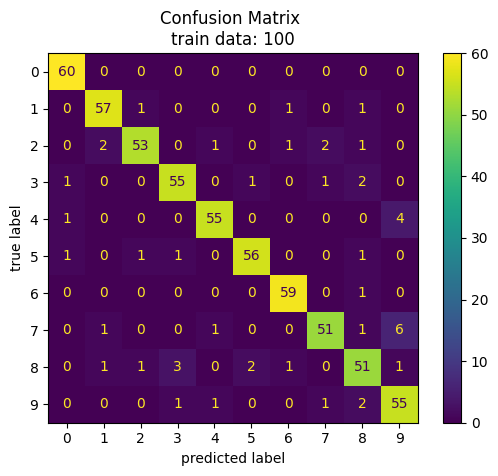

In [48]:
mat = confusion_matrix(label, predict)
ConfusionMatrixDisplay(mat).plot()
plt.title("Confusion Matrix "+"\n"+"train data: " + str(dimension_of_train))
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
plt.close()

In [49]:
print("")
print("Classification_Report")
print("train data: " + str(dimension_of_train))
print(classification_report(label, predict))
print("")


Classification_Report
train data: 100
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.93      0.95      0.94        60
           2       0.95      0.88      0.91        60
           3       0.92      0.92      0.92        60
           4       0.95      0.92      0.93        60
           5       0.95      0.93      0.94        60
           6       0.95      0.98      0.97        60
           7       0.93      0.85      0.89        60
           8       0.85      0.85      0.85        60
           9       0.83      0.92      0.87        60

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600


